<a href="https://colab.research.google.com/github/DilshodbekMX/GoogleColab/blob/main/Neural_Network_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [376]:
import sklearn

In [377]:
from sklearn.datasets import make_circles

n_samples = 1000

X, y = make_circles(n_samples, noise=0.03, random_state=42)

In [378]:
len(X), len(y)

(1000, 1000)

In [379]:
X[:5], y[:5]

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        [-0.39373073,  0.69288277],
        [ 0.44220765, -0.89672343]]),
 array([1, 1, 1, 1, 0]))

In [380]:
import pandas as pd
circles = pd.DataFrame({"X1":X[:,0], "X2":X[:,1], "label":y})
circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


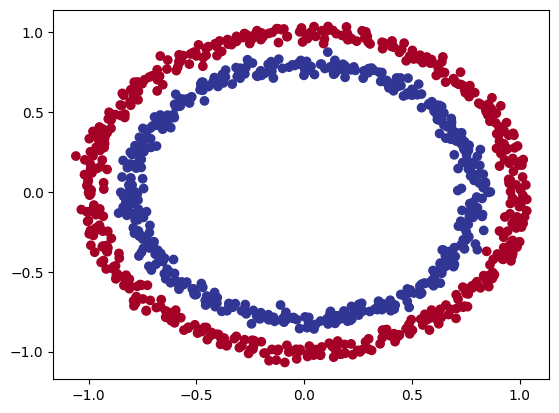

In [381]:
import matplotlib.pyplot as plt
plt.scatter(x=X[:,0], y=X[:,1], c=y, cmap=plt.cm.RdYlBu)

In [382]:
X.shape, y.shape

((1000, 2), (1000,))

In [383]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [384]:
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

In [385]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [386]:
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

In [387]:
import torch
from torch import nn

device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [388]:
X_train, X_train.shape

(array([[ 0.65794626, -0.46508097],
        [ 0.63194897, -0.7346633 ],
        [-1.00861631, -0.12403051],
        ...,
        [ 0.01574478, -1.02998534],
        [ 1.01102578,  0.16802846],
        [ 0.55778227, -0.57087612]]),
 (800, 2))

In [389]:
class  CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()

    self.layer_1 = nn.Linear(in_features=2,out_features=5)
    self.layer_2 = nn.Linear(in_features=5,out_features=1)
    # self.two_linear_layers = nn.Sequential(
    #     nn.Linear(in_features=2,out_features=5),
    #     nn.Linear(in_features=5,out_features=1)
    # )

  def forward(self, x:torch.Tensor) -> torch.Tensor:
    return self.layer_2(self.layer_1(x))
    # return self.two_linear_layers(x)


model_0 = CircleModelV0().to(device)
model_0


CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [390]:
next(model_0.parameters()).device

device(type='cpu')

In [391]:
model_0 = two_linear_layers = nn.Sequential(
        nn.Linear(in_features=2,out_features=5),
        nn.Linear(in_features=5,out_features=1)
    ).to(device)

In [392]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.0829, -0.2872],
                      [ 0.4691, -0.5582],
                      [-0.3260, -0.1997],
                      [-0.4252,  0.0667],
                      [-0.6984,  0.6386]])),
             ('0.bias', tensor([-0.6007,  0.5459,  0.1177, -0.2296,  0.4370])),
             ('1.weight',
              tensor([[ 0.0697,  0.3613,  0.0489, -0.1410,  0.1202]])),
             ('1.bias', tensor([-0.1213]))])

In [393]:
X_test = torch.Tensor(X_test)
X_train = torch.Tensor(X_train)
y_test = torch.Tensor(y_test)
y_train = torch.Tensor(y_train)
with torch.inference_mode():
  untrained_preds = model_0(X_test.to(device))

print(f"{len(untrained_preds)}, {untrained_preds.shape})")
print(f"{len(X_test)}, {X_test.shape}")
print(f"{torch.round(untrained_preds[:10].T)}")
print(f"{y_test[:10]}")



200, torch.Size([200, 1]))
200, torch.Size([200, 2])
tensor([[-0., -0., 0., -0., 0., 0., 0., 0., 0., -0.]])
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


In [394]:
loss_fn = nn.BCEWithLogitsLoss()

optimizer = torch.optim.Adam(params=model_0.parameters(),lr=0.001)

In [395]:
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct / len(y_pred)) * 100

  return acc

In [396]:
model_0.eval()
with torch.inference_mode():
  y_logits = model_0(X_test.to(device))[:5]
y_logits

tensor([[-0.0338],
        [-0.0309],
        [ 0.0894],
        [-0.0692],
        [ 0.2967]])

In [397]:
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.4916],
        [0.4923],
        [0.5223],
        [0.4827],
        [0.5736]])

In [398]:
torch.round(y_pred_probs)

tensor([[0.],
        [0.],
        [1.],
        [0.],
        [1.]])

In [399]:
y_preds = torch.round(y_pred_probs)

y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))

print(torch.eq(y_preds.squeeze(),y_pred_labels.squeeze()))
y_preds.squeeze()

tensor([True, True, True, True, True])


tensor([0., 0., 1., 0., 1.])

In [400]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 100

for epoch in range(epochs):
  model_0.train()

  y_logits = model_0(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  loss = loss_fn(y_logits, y_train)

  acc = accuracy_fn(y_true=y_train, y_pred=y_pred)

  optimizer.zero_grad()

  loss.backward()
  optimizer.step()

  model_0.eval()
  with torch.inference_mode():
    test_logits = model_0(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))
    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_true=y_test,y_pred=test_pred)
  if epoch % 10 == 0:
    print(f"Epoch {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test loss: {test_loss:.5f} | Test acc: {test_acc:.2f}%")

Epoch 0 | Loss: 0.69796, Acc: 51.88% | Test loss: 0.69451 | Test acc: 58.00%
Epoch 10 | Loss: 0.69657, Acc: 51.88% | Test loss: 0.69356 | Test acc: 57.00%
Epoch 20 | Loss: 0.69550, Acc: 51.00% | Test loss: 0.69289 | Test acc: 55.00%
Epoch 30 | Loss: 0.69473, Acc: 51.88% | Test loss: 0.69249 | Test acc: 52.50%
Epoch 40 | Loss: 0.69421, Acc: 51.12% | Test loss: 0.69231 | Test acc: 49.50%
Epoch 50 | Loss: 0.69386, Acc: 51.25% | Test loss: 0.69229 | Test acc: 51.00%
Epoch 60 | Loss: 0.69363, Acc: 50.12% | Test loss: 0.69237 | Test acc: 51.00%
Epoch 70 | Loss: 0.69347, Acc: 50.38% | Test loss: 0.69251 | Test acc: 50.50%
Epoch 80 | Loss: 0.69334, Acc: 50.38% | Test loss: 0.69269 | Test acc: 50.50%
Epoch 90 | Loss: 0.69325, Acc: 51.00% | Test loss: 0.69289 | Test acc: 50.00%


In [401]:
import requests
from pathlib import Path
if Path("helper_functions.py").is_file():
  print("Exists")
else:
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

Exists


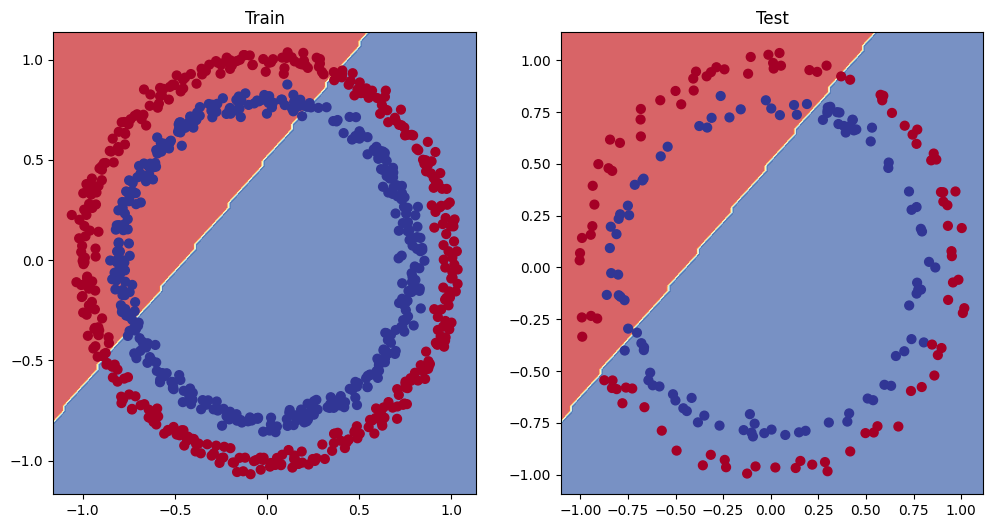

In [402]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")

plot_decision_boundary(model_0, X_test, y_test)

In [403]:
class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=32)
    self.layer_2 = nn.Linear(in_features=32, out_features=64)
    self.layer_3 = nn.Linear(in_features=64, out_features=32)
    self.layer_4 = nn.Linear(in_features=32, out_features=1)

    self.relu = nn.ReLU()

  def forward(self, x):
    self.ml_1 = self.relu(self.layer_1(x))
    self.ml_2 = self.relu(self.layer_2(self.ml_1))
    self.ml_3 = self.relu(self.layer_3(self.ml_2))
    return self.layer_4(self.ml_3)

model_1 = CircleModelV1().to(device)
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=32, bias=True)
  (layer_2): Linear(in_features=32, out_features=64, bias=True)
  (layer_3): Linear(in_features=64, out_features=32, bias=True)
  (layer_4): Linear(in_features=32, out_features=1, bias=True)
  (relu): ReLU()
)

In [404]:
loss_fn_1 = nn.BCEWithLogitsLoss()
optimizer_1 = torch.optim.Adam(params=model_1.parameters(),lr=0.001)

In [405]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 100

for epoch in range(epochs):
  model_1.train()

  y_logits = model_1(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  loss = loss_fn_1(y_logits, y_train)

  acc = accuracy_fn(y_true=y_train, y_pred=y_pred)

  optimizer_1.zero_grad()

  loss.backward()
  optimizer_1.step()

  model_1.eval()
  with torch.inference_mode():
    test_logits = model_1(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))
    test_loss = loss_fn_1(test_logits, y_test)
    test_acc = accuracy_fn(y_true=y_test,y_pred=test_pred)
  if epoch % 10 == 0:
    print(f"Epoch {epoch} | Loss: {loss:.5f}, Acc: {acc:.4f}% | Test loss: {test_loss:.5f} | Test acc: {test_acc:.4f}%")

  if epoch == epochs-1:
    print(f"Epoch {epoch} | Loss: {loss:.5f}, Acc: {acc:.4f}% | Test loss: {test_loss:.5f} | Test acc: {test_acc:.4f}%")

Epoch 0 | Loss: 0.69310, Acc: 50.0000% | Test loss: 0.69197 | Test acc: 50.0000%
Epoch 10 | Loss: 0.68895, Acc: 55.3750% | Test loss: 0.68869 | Test acc: 54.5000%
Epoch 20 | Loss: 0.68424, Acc: 60.2500% | Test loss: 0.68450 | Test acc: 59.0000%
Epoch 30 | Loss: 0.67539, Acc: 66.1250% | Test loss: 0.67674 | Test acc: 64.0000%
Epoch 40 | Loss: 0.65925, Acc: 75.7500% | Test loss: 0.66157 | Test acc: 77.5000%
Epoch 50 | Loss: 0.63017, Acc: 84.8750% | Test loss: 0.63228 | Test acc: 84.5000%
Epoch 60 | Loss: 0.58094, Acc: 93.0000% | Test loss: 0.58335 | Test acc: 92.5000%
Epoch 70 | Loss: 0.50883, Acc: 98.3750% | Test loss: 0.51312 | Test acc: 98.0000%
Epoch 80 | Loss: 0.41547, Acc: 99.8750% | Test loss: 0.42401 | Test acc: 99.0000%
Epoch 90 | Loss: 0.31097, Acc: 99.8750% | Test loss: 0.32443 | Test acc: 99.5000%
Epoch 99 | Loss: 0.22213, Acc: 100.0000% | Test loss: 0.24020 | Test acc: 100.0000%


In [408]:
model_1.eval()
with torch.inference_mode():
  y_preds = torch.round(torch.sigmoid(model_1(X_test))).squeeze()
y_preds[:10], y_test[:10]

(tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]))

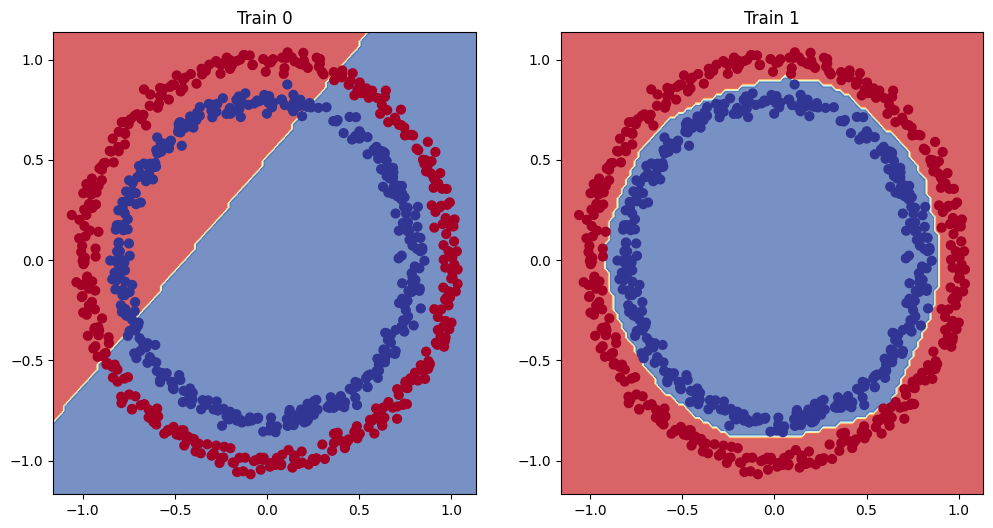

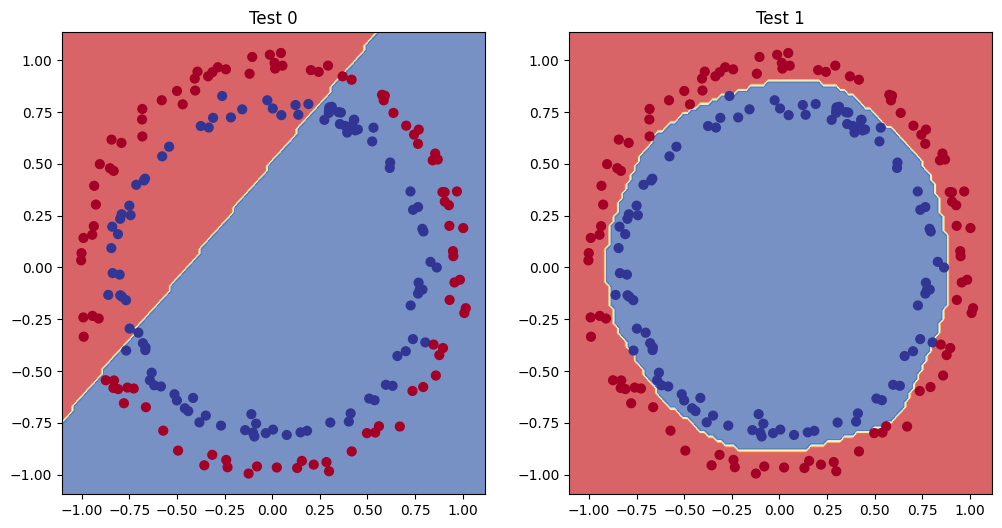

In [414]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.title("Train 0")
plot_decision_boundary(model_0, X_train, y_train)

plt.subplot(1,2,2)
plt.title("Train 1")
plot_decision_boundary(model_1, X_train, y_train)

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Test 0")
plot_decision_boundary(model_0, X_test, y_test)

plt.subplot(1,2,2)
plt.title("Test 1")
plot_decision_boundary(model_1, X_test, y_test)

# Multi Class Classification|

In [416]:
from sklearn.datasets import make_blobs

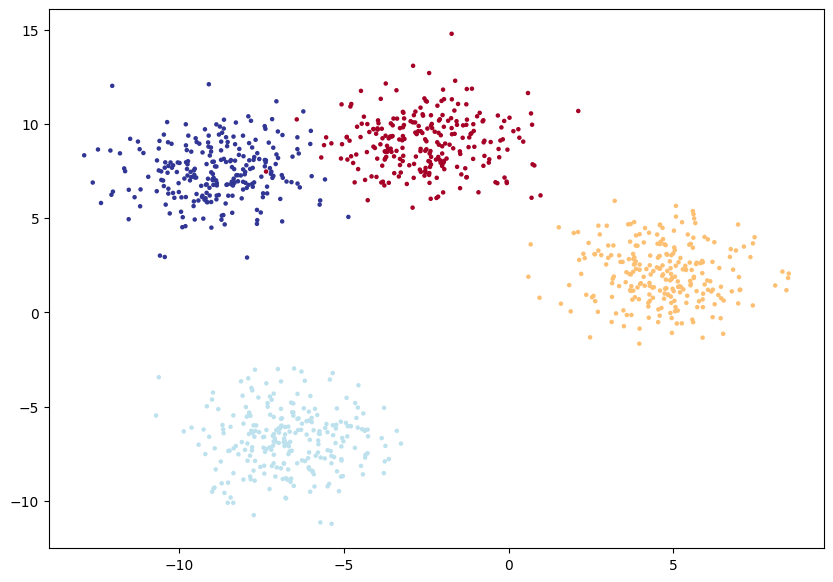

In [434]:
NUM_CLASSES = 4
NUM_FFEATURES = 2
RANDOM_SEED = 42

X_blob, y_blob = make_blobs(n_samples=1000, n_features=NUM_FFEATURES, centers=NUM_CLASSES, cluster_std=1.5, random_state=RANDOM_SEED)

X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.float)

X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob, y_blob, test_size=0.2, random_state=RANDOM_SEED)

plt.figure(figsize=(10,7))
plt.scatter(X_blob[:,0], X_blob[:,1], c=y_blob, cmap=plt.cm.RdYlBu,s=5)

In [445]:
class BlobModel(nn.Module):
  def __init__(self, input_features, output_features, hidden_units=8):
    super().__init__()

    self.linear_layer_stack = nn.Sequential(
         nn.Linear(in_features=input_features, out_features=hidden_units),
         nn.ReLU(),
         nn.Linear(in_features=output_features, out_features=hidden_units),
         nn.ReLU(),
         nn.Linear(in_features=hidden_units, out_features=output_features),
    )

  def forward(self, x):
    return linear_layer_stack(x)

multi_model = BlobModel(input_features=2, output_features=4).to(device)

multi_model

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=4, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [ ]:
loss_multi = nn.CrossEntropyLoss